# Capstone Regression Project

## Business Understanding

## Data Understanding

-describes source of dataset
-what each record represents
-which column is begin used as the regress

## Data Preparation

### Loading the Data

In [1]:
#importing all appropriate Pythonic libraries and packages 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
import re
%matplotlib inline

In [2]:
# reading in the King County dataset to Pandas
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
# dropping the placeholder column
df.drop(labels='id', axis=1, inplace=True)

In [5]:
# converting all dates to datetime
df['date'] = pd.to_datetime(df['date'])

In [6]:
# isolating the zip code 
# alternative methods to achieve same
# df['Zipcode'] = df['address'].str.extract(r'(\d{5}\-?\d{0,4})')
# df['address'][0].split(',')[2][-5:]
# df['address'][1000][-20:-15]

In [7]:
df['Zipcode'] = df['address'].apply(lambda x: x[-20:-15])

In [8]:
df['Zipcode'] = df['Zipcode'].astype(int)

<AxesSubplot:>

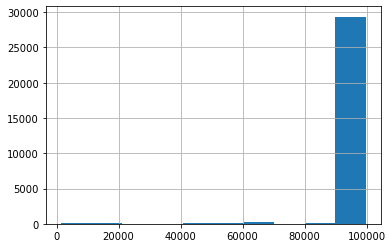

In [9]:
df['Zipcode'].hist()

In [10]:
# controling for outliers
df = df.loc[(df['Zipcode'] > 98000) & (df['Zipcode'] <= 98288)]

In [11]:
# reading in Zip/Neighborhood/Population dataset
df_zip = pd.read_csv('data/kc_zipcode_details.csv', index_col=0)
df_zip.head()

,Neighborhood,Population
ZIP Code,,
98001,Auburn,31911.0
98002,Auburn,31647.0
98003,Federal Way,44151.0
98004,Bellevue,27946.0
98005,Bellevue,17714.0


In [12]:
df_zip.Neighborhood.nunique()

38

In [13]:
# changing index name to match other dataset
df_zip.index.names = ['Zipcode']

In [14]:
df_zip.reset_index(inplace=True)
df_zip.head()

,Zipcode,Neighborhood,Population
0,98001,Auburn,31911.0
1,98002,Auburn,31647.0
2,98003,Federal Way,44151.0
3,98004,Bellevue,27946.0
4,98005,Bellevue,17714.0


<AxesSubplot:>

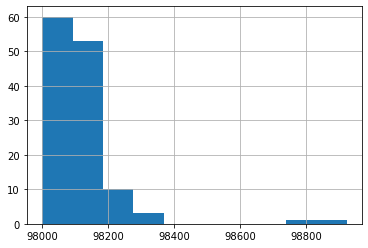

In [15]:
# Outliers
df_zip['Zipcode'].hist()

In [16]:
# controlling for outliers
df_zip = df_zip.loc[(df_zip['Zipcode'] > 98000) & (df_zip['Zipcode'] <= 98288)]

In [17]:
df_zip.nunique()

Zipcode         124
Neighborhood     34
Population       81
dtype: int64

In [18]:
df['Zipcode'].nunique()

81

### Renaming Selldate

In [19]:
# renaming date to selldate
rnmdate = {'date':'selldate'}
df.rename(columns=rnmdate, inplace=True)

## Engineering Yr_Old

In [20]:
# creating a year old column
df['yr_old'] = np.where(df['yr_renovated'] !=0,df.selldate.apply(lambda x: x.year) - df['yr_renovated'],
                        df['selldate'].apply(lambda x: x.year) - df['yr_built'])

In [21]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,Zipcode,yr_old
count,2.920800e+04,29208.000000,29208.000000,29208.000000,2.920800e+04,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000
mean,1.113195e+06,3.435497,2.332221,2131.250342,1.720087e+04,1.516947,1826.203437,480.945974,336.247364,216.391742,1973.852267,93.870241,47.543569,-122.214082,98077.348740,44.764688
std,8.956666e+05,0.978918,0.896185,977.621843,6.129149e+04,0.548426,881.013444,586.026595,286.269126,246.817642,31.688131,422.843882,0.146367,0.143646,54.326649,31.012330
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.155265,-122.526650,98001.000000,-1.000000
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.431060,-122.328355,98032.000000,18.000000
50%,8.689000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,141.500000,1976.000000,0.000000,47.557997,-122.233798,98059.000000,43.000000
75%,1.310000e+06,4.000000,3.000000,2640.000000,1.078075e+04,2.000000,2290.000000,960.000000,510.250000,310.000000,2001.000000,0.000000,47.672063,-122.127324,98117.000000,66.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,48.111504,-121.163960,98288.000000,122.000000


In [22]:
# controlling for dates where house was sold after renovation
df.loc[df['yr_old'] < 0, 'yr_old'] = 0

In [23]:
df.yr_old.value_counts()

0      1365
1       659
44      504
54      478
16      468
       ... 
122      32
87       31
88       30
119      30
120      27
Name: yr_old, Length: 123, dtype: int64

### Data Cleaning

In [24]:
# identifying missing values 
df.isna().sum()/df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.000993
sewer_system     0.000445
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
Zipcode          0.000000
yr_old           0.000000
dtype: float64

In [25]:
# remove missing values in columns
df.dropna(subset=['heat_source', 'sewer_system'], axis=0, inplace=True)

In [26]:
# identify missing values in zip code data
df_zip.isna().sum()/df.shape[0]

Zipcode         0.00000
Neighborhood    0.00000
Population      0.00144
dtype: float64

In [27]:
df_zip.dropna(subset=['Population'], axis=0, inplace=True)

## Merge on zipcode to include neighborhood/population

In [28]:
df1 = df.merge(df_zip, how='left', on='Zipcode')

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29168 entries, 0 to 29167
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29168 non-null  datetime64[ns]
 1   price          29168 non-null  float64       
 2   bedrooms       29168 non-null  int64         
 3   bathrooms      29168 non-null  float64       
 4   sqft_living    29168 non-null  int64         
 5   sqft_lot       29168 non-null  int64         
 6   floors         29168 non-null  float64       
 7   waterfront     29168 non-null  object        
 8   greenbelt      29168 non-null  object        
 9   nuisance       29168 non-null  object        
 10  view           29168 non-null  object        
 11  condition      29168 non-null  object        
 12  grade          29168 non-null  object        
 13  heat_source    29168 non-null  object        
 14  sewer_system   29168 non-null  object        
 15  sqft_above     2916

In [30]:
# identify missing data in new dataset
df1.isna().sum()/df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.000000
sewer_system     0.000000
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
Zipcode          0.000000
yr_old           0.000000
Neighborhood     0.000549
Population       0.000549
dtype: float64

In [31]:
df1.dropna(subset=['Population', 'Neighborhood'], axis=0, inplace=True)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29152 entries, 0 to 29167
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29152 non-null  datetime64[ns]
 1   price          29152 non-null  float64       
 2   bedrooms       29152 non-null  int64         
 3   bathrooms      29152 non-null  float64       
 4   sqft_living    29152 non-null  int64         
 5   sqft_lot       29152 non-null  int64         
 6   floors         29152 non-null  float64       
 7   waterfront     29152 non-null  object        
 8   greenbelt      29152 non-null  object        
 9   nuisance       29152 non-null  object        
 10  view           29152 non-null  object        
 11  condition      29152 non-null  object        
 12  grade          29152 non-null  object        
 13  heat_source    29152 non-null  object        
 14  sewer_system   29152 non-null  object        
 15  sqft_above     2915

In [33]:
df1.isna().sum()/df1.shape[0]

selldate         0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
greenbelt        0.0
nuisance         0.0
view             0.0
condition        0.0
grade            0.0
heat_source      0.0
sewer_system     0.0
sqft_above       0.0
sqft_basement    0.0
sqft_garage      0.0
sqft_patio       0.0
yr_built         0.0
yr_renovated     0.0
address          0.0
lat              0.0
long             0.0
Zipcode          0.0
yr_old           0.0
Neighborhood     0.0
Population       0.0
dtype: float64

In [34]:
# df1['condition'].value_counts()

In [35]:
# df1.loc[(df1['nuisance'] == 'YES') & (df1['greenbelt'] == 'YES'), 'protected'] = 'protected'
# df1.loc[(df1['nuisance'] != 'YES') | (df1['greenbelt'] != 'YES'), 'protected'] = 'unprotected'

In [36]:
# df1['protected']

In [37]:
# df1['grade'].value_counts()

HomeSales 
standard scaling allows you to find coefficients. 
Be sure to include metric - r squared - to describe overall model performance.  
collineriety 
log scalling
remove outliers.  
Increase r squared. 


1. run model
2. see improvements, clean/feature engineer.  
3. see coefficients becoming more accurate.


## Target distribution

In [38]:
df1.corr()['price']

price            1.000000
bedrooms         0.290832
bathrooms        0.488047
sqft_living      0.616651
sqft_lot         0.086778
floors           0.199824
sqft_above       0.546001
sqft_basement    0.246354
sqft_garage      0.267526
sqft_patio       0.317651
yr_built         0.106133
yr_renovated     0.085455
lat              0.297267
long             0.081310
Zipcode         -0.104735
yr_old          -0.138201
Population      -0.112760
Name: price, dtype: float64

## Modeling 1:08

In [39]:
# Creating categorical variables
cats = df1[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'Neighborhood', 'grade']]
cats1 = df1[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'Neighborhood', 'grade']]

### Baseline Model

In [40]:
pred_cols = [x for x in df1.columns if x not in cats1]

In [41]:
pred_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'yr_old',
 'Population']

In [42]:
# create baseline model
preds = df1[pred_cols]
target = df1['price']

In [43]:
y = target
X = preds
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     1835.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:19:18   Log-Likelihood:            -4.3121e+05
No. Observations:               29152   AIC:                         8.625e+05
Df Residuals:                   29136   BIC:                         8.626e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.983e+07   4.34e+06    -23.015      0.000   -1.08e+08   -9.13e+07
bedrooms      -1.353e+05   5210.164    -25.964      0.000   -1.45e+05   -1.25e+05
bathrooms      1.169e+05   7694.176     15.190      0.000    1.02e+05    1.32e+05
sqft_living     327.8317     17.234     19.022      0.000     294.052     361.612
sqft_lot          0.1725      0.064      2.680      0.007       0.046       0.299
floors        -9.949e+04   9796.097    -10.156      0.000   -1.19e+05   -8.03e+04
sqft_above      291.6381     17.605     16.566      0.000     257.132     326.144
sqft_basement    78.0302     13.088      5.962      0.000      52.377     103.683
sqft_garage     -18.9436     18.425     -1.028      0.304     -55.058      17.171
sqft_patio      256.9688     17.060     15.063      0.000     223.531     290.406
yr_built       2736.3220    726.700      3.765      0.000    1311.957    4160.687
yr_renovated    201.2133     22.979      8.756      0.000     156.173     246.254
lat            1.561e+06   2.72e+04     57.293      0.000    1.51e+06    1.61e+06
long          -1.651e+05    3.2e+04     -5.153      0.000   -2.28e+05   -1.02e+05
yr_old         4815.9255    730.771      6.590      0.000    3383.581    6248.270
Population       -2.5537      0.351     -7.275      0.000      -3.242      -1.866
==============================================================================
Omnibus:                    45295.400   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         78707298.800
Skew:                           9.421   Prob(JB):                         0.00
Kurtosis:                     256.855   Cond. No.                     7.35e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`Bathrooms` is the most highly correlated feature in the baseline numeric model.  Bedrooms is strangely inversely correlated to price.  All coefficients except `sqft_garage` are statistically significant.  This model uses both discrete and continuous numeric predictors in the baseline.  

In [45]:
baseline_mae = mean_absolute_error(y, results.predict(sm.add_constant(X)))
baseline_mae

338488.677090066

Overall this model is off by about $398,942. 

The intercept is extremely negative, at minus 9 to the 4th power.  The coefficient for `sqft_living` is about $565.  

This means that for each additional square foot of living space, the cost of the home increases by about $565.  

The Mean Absolute Error('MAE') indicates that we are about $338,484 off in our prediction of `price`.   EXPLAIN.  

In [46]:
## improve upon the baseline

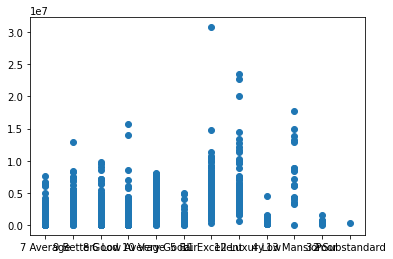

In [47]:
plt.scatter(df1.grade, df1.price)

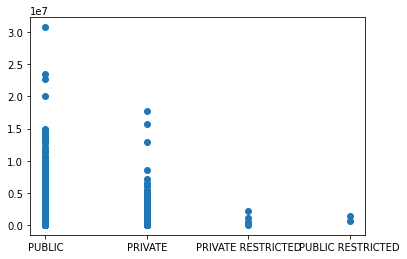

In [48]:
plt.scatter(df1.sewer_system, df1.price)

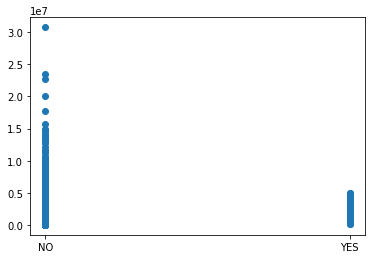

In [49]:
plt.scatter(df1.greenbelt, df1.price)

## Grade

In [50]:
# df1.grade.value_counts()

In [51]:
# df1.grade.value_counts()

In [52]:
# # grade_map = {
#     "7 Average": 7,
#     "8 Good": 8,
#     "9 Better": 9,
#     "6 Low Average": 6,
#     "5 Fair": 5,
#     "4 Low": 4,
#     "3 Poor": 3,
#     "2 Substandard": 2,
#     "10 Very Good": 10,
#     "11 Excellent": 11,
#     "13 Mansion": 13,
#     "12 Luxury": 12,
# }

In [53]:
# df1.grade = df1.grade.map(grade_map)

In [54]:
# making results more model friendly 
# dum_df1.loc[dum_df1['grade'] == '2 Substandard', 'grade'] = 1
# dum_df1.loc[dum_df1['grade'] == '3 Poor', 'grade'] = 1
# dum_df1.loc[dum_df1['grade'] == '4 Low', 'grade'] = 1

# dum_df1.loc[dum_df1['grade'] == '5 Fair', 'grade'] = 2
# dum_df1.loc[dum_df1['grade'] == '6 Low Average', 'grade'] = 2
# dum_df1.loc[dum_df1['grade'] == '7 Average', 'grade'] = 2

# dum_df1.loc[dum_df1['grade'] == '8 Good', 'grade'] = 3
# dum_df1.loc[dum_df1['grade'] == '9 Better', 'grade'] = 3
# dum_df1.loc[dum_df1['grade'] == '10 Very Good', 'grade'] = 3

# dum_df1.loc[dum_df1['grade'] == '11 Excellent', 'grade'] = 4
# dum_df1.loc[dum_df1['grade'] == '12 Luxury', 'grade'] = 4
# dum_df1.loc[dum_df1['grade'] == '13 Mansion', 'grade'] = 4

In [55]:
# Creating categorical variables
# cats = df1[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'Neighborhood']]
# cats1 = df1[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'Neighborhood']]

Clearly we dont want to force ordinal categories into continuous numeric variables.  

In [56]:
cat_cols = cats.columns

## Lesson

scatter plot: visualize relationship  

box plot: gives you quantile info

histograms: distribution of frequencies 

qq plot residuals (outside of range) is 

In [57]:
# plt.boxplot(df1.price)

## Discrete numeric predictors 

In [58]:
# fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
# df1.plot.scatter(x='bathrooms', y='price', ax=ax1)
# df1.plot.scatter(x='bedrooms', y='price', ax=ax2)

In [59]:
# fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
# df1.plot.scatter(x='yr_renovated', y='price', ax=ax1)
# df1.plot.scatter(x='floors', y='price', ax=ax2)

## Continuous numerice predictors

In [60]:
# fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
# df1.plot.scatter(x='sqft_living', y='price', ax=ax1)
# df1.plot.scatter(x='sqft_lot', y='price', ax=ax2)

In [61]:
# fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
# df1.plot.scatter(x='Population', y='price', ax=ax1)
# df1.plot.scatter(x='sqft_above', y='price', ax=ax2)

Population looks like a discrete measure here.  We will go with sqft living as the most correlated to begin our greedy algorithm approach.

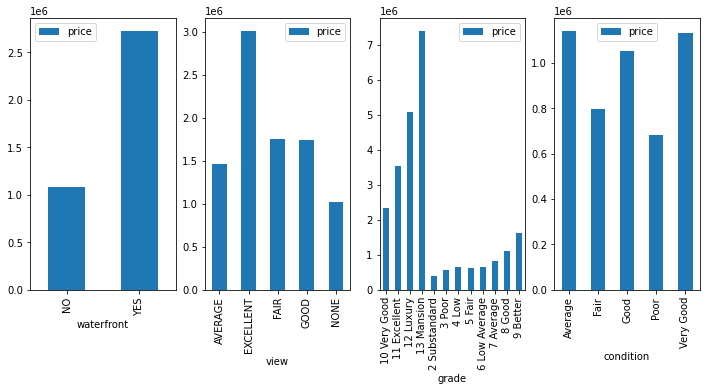

In [62]:
cats2 = ['waterfront', 'view', 'grade', 'condition']
fig, axes = plt.subplots(ncols=len(cats2), figsize=(12,5))
for index, feature in enumerate(cats2):
    df1.groupby(feature).mean().plot.bar(
        y='price', ax=axes[index])


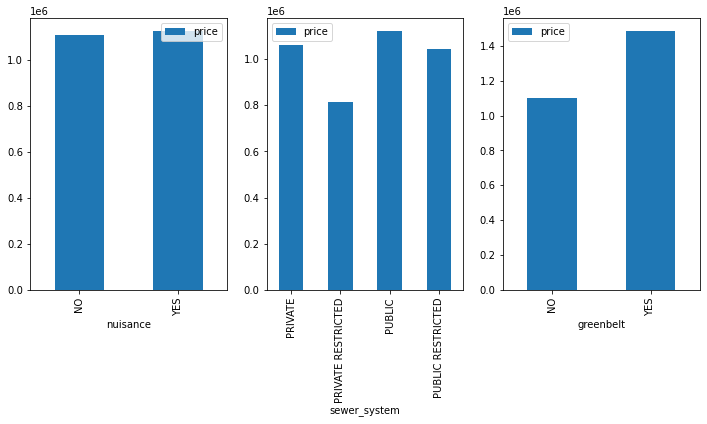

In [63]:
cats3 = ['nuisance', 'sewer_system', 'greenbelt']
fig, axes = plt.subplots(ncols=len(cats3), figsize=(12,5))
for index, feature in enumerate(cats3):
    df1.groupby(feature).mean().plot.bar(
        y='price', ax=axes[index])

In [64]:
y = df1.price
X_iter = df1[['sqft_living', 'waterfront', 'grade']]

In [65]:
X_iter = pd.get_dummies(X_iter, columns=['grade', 'waterfront'], drop_first=True)

In [66]:
model = sm.OLS(y, sm.add_constant(X_iter))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     2248.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:19:19   Log-Likelihood:            -4.3078e+05
No. Observations:               29152   AIC:                         8.616e+05
Df Residuals:                   29138   BIC:                         8.617e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.163e+06   2

## Partial regressions

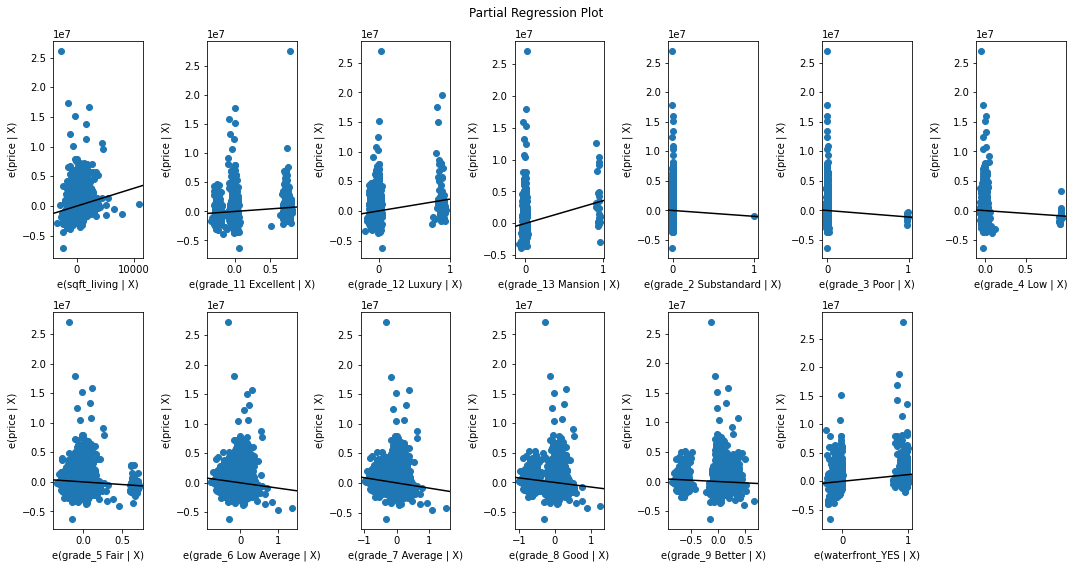

In [67]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    results, 
    exog_idx=list(X_iter.columns),
    grid=(2,7),
    fig=fig)
plt.tight_layout()
plt.show()

## Investigating categorical variables

## Condition

In [68]:
df1['condition'].value_counts()

Average      17572
Good          8041
Very Good     3255
Fair           223
Poor            61
Name: condition, dtype: int64

<AxesSubplot:xlabel='view', ylabel='price'>

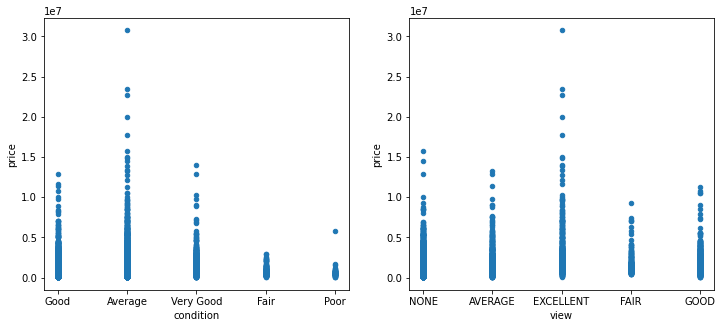

In [69]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='condition', y='price', ax=ax1)
df1.plot.scatter(x='view', y='price', ax=ax2)

<AxesSubplot:xlabel='grade', ylabel='price'>

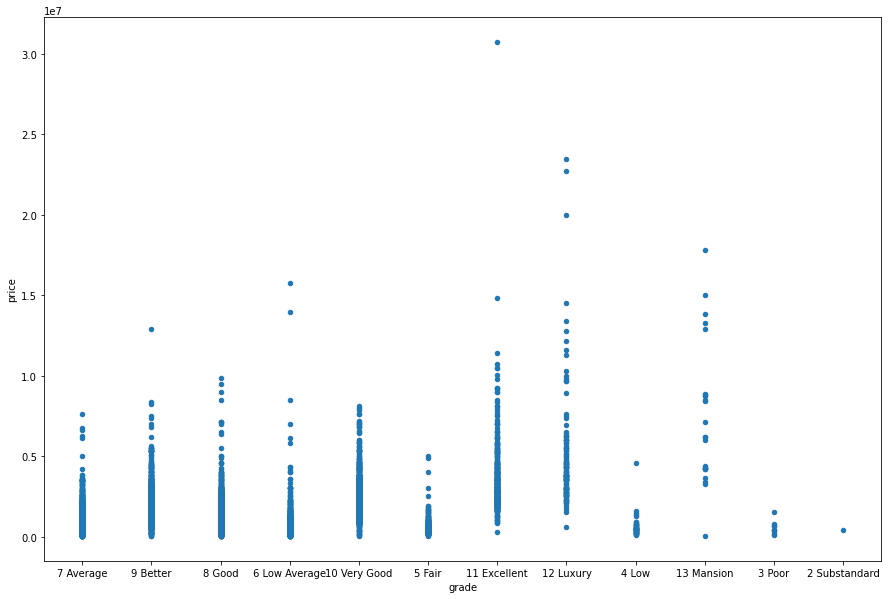

In [70]:
fig, (ax) = plt.subplots (ncols=1, figsize = (15, 10))
df1.plot.scatter(x='grade', y='price', ax=ax)

In [71]:
# df1.loc[df1['condition'] == 'Poor', 'condition'] = 'Fair'

In [72]:
# plt.scatter(df1.view, df1.price)

In [73]:
# # running our model with dummified predictors
# X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
#                        'sewer_system_PUBLIC RESTRICTED', 'yr_built', 'sqft_above', 'bathrooms',
#                       'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
#                       'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
#                       'Neighborhood_Baring' ], axis=1)
# y=dum_df1.price

# model_1 = sm.OLS(y, sm.add_constant(X1))
# results1 = model_1.fit()
# results1.summary()

In [74]:
# baseline_mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
# # baseline_mae

In [75]:
dum_df1 = pd.get_dummies(data=df1, columns=cat_cols, drop_first=True)

In [76]:
dum_df1.columns

Index(['selldate', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'address', 'lat', 'long', 'Zipcode',
       'yr_old', 'Population', 'waterfront_YES', 'greenbelt_YES',
       'nuisance_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED', 'Neighborhood_Baring',
       'Neighborhood_Bellevue', 'Neighborhood_Black Diamond',
       'Neighborhood_Bothell', 'Neighborhood_Carnation', 'Neighborhood_Duvall',
       'Neighborhood_Enumclaw', 'Neighborhood_Fall City',
       'Neighborhood_Federal Way', 'Neighborhood_

Drop columns not correlated.  per gp 9-19.  

In [77]:
# plt.hist(df1.price)

In [78]:
# sns.distplot(df1.price, bins=30, kde=True)

In [79]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,Zipcode,yr_old,Population
count,2.915200e+04,29152.000000,29152.000000,29152.000000,2.915200e+04,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000
mean,1.113367e+06,3.436883,2.332739,2131.673196,1.712848e+04,1.516654,1826.396371,481.397503,336.458905,216.378979,1973.830303,93.779535,47.543349,-122.214379,98077.248148,44.786841,30470.448957
std,8.958348e+05,0.976831,0.894813,976.875996,6.084812e+04,0.548313,880.303274,586.205229,286.244187,246.792890,31.665996,422.656961,0.145970,0.143108,54.133260,30.988383,11293.348724
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.159700,-122.526650,98001.000000,0.000000,294.000000
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.431014,-122.328445,98032.000000,18.000000,21147.000000
50%,8.690000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,141.500000,1976.000000,0.000000,47.557950,-122.234025,98059.000000,43.000000,31365.000000
75%,1.310000e+06,4.000000,3.000000,2640.000000,1.077125e+04,2.000000,2290.000000,960.000000,520.000000,310.000000,2001.000000,0.000000,47.672016,-122.127607,98117.000000,66.000000,39816.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,47.789830,-121.163960,98288.000000,122.000000,58442.000000


## Bedrooms

In [80]:
df1.bedrooms.value_counts()

3     12318
4      9490
2      3539
5      2767
6       493
1       371
7        80
0        38
8        37
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64

In [81]:
dum_df1.loc[dum_df1['bedrooms'] > 6, 'bedrooms'] = 6

In [82]:
# sns.heatmap(X1.corr())

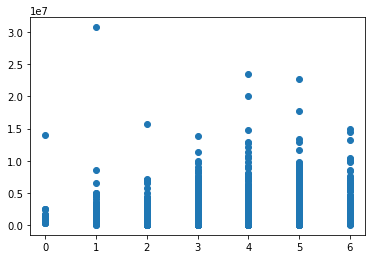

In [83]:
plt.scatter(dum_df1.bedrooms, dum_df1.price)

# Neighborhood

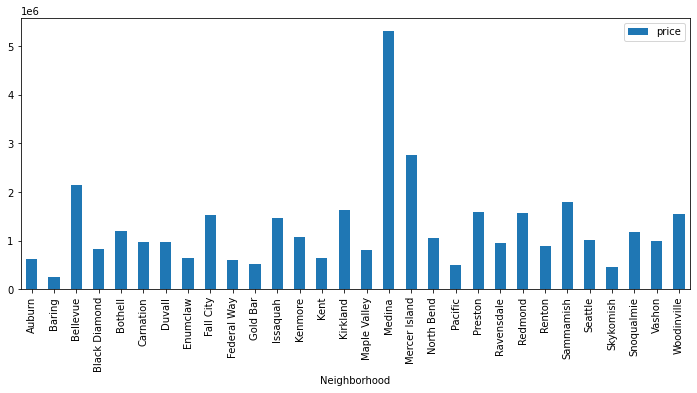

In [84]:
Neigh = ['Neighborhood']
fig, ax = plt.subplots(ncols=len(Neigh), figsize=(12,5))
for index, feature in enumerate(Neigh):
    df1.groupby(feature).mean().plot.bar(
        y='price', ax=ax)


In [85]:
y = df1.price
X_iter1 = df1[['Neighborhood', 'sqft_living', 'waterfront']]
X_iter1 = pd.get_dummies(X_iter1, columns=['Neighborhood', 'waterfront'], drop_first=True)

In [86]:
model = sm.OLS(y, sm.add_constant(X_iter1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     1236.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:19:22   Log-Likelihood:            -4.2867e+05
No. Observations:               29152   AIC:                         8.574e+05
Df Residuals:                   29120   BIC:                         8.577e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

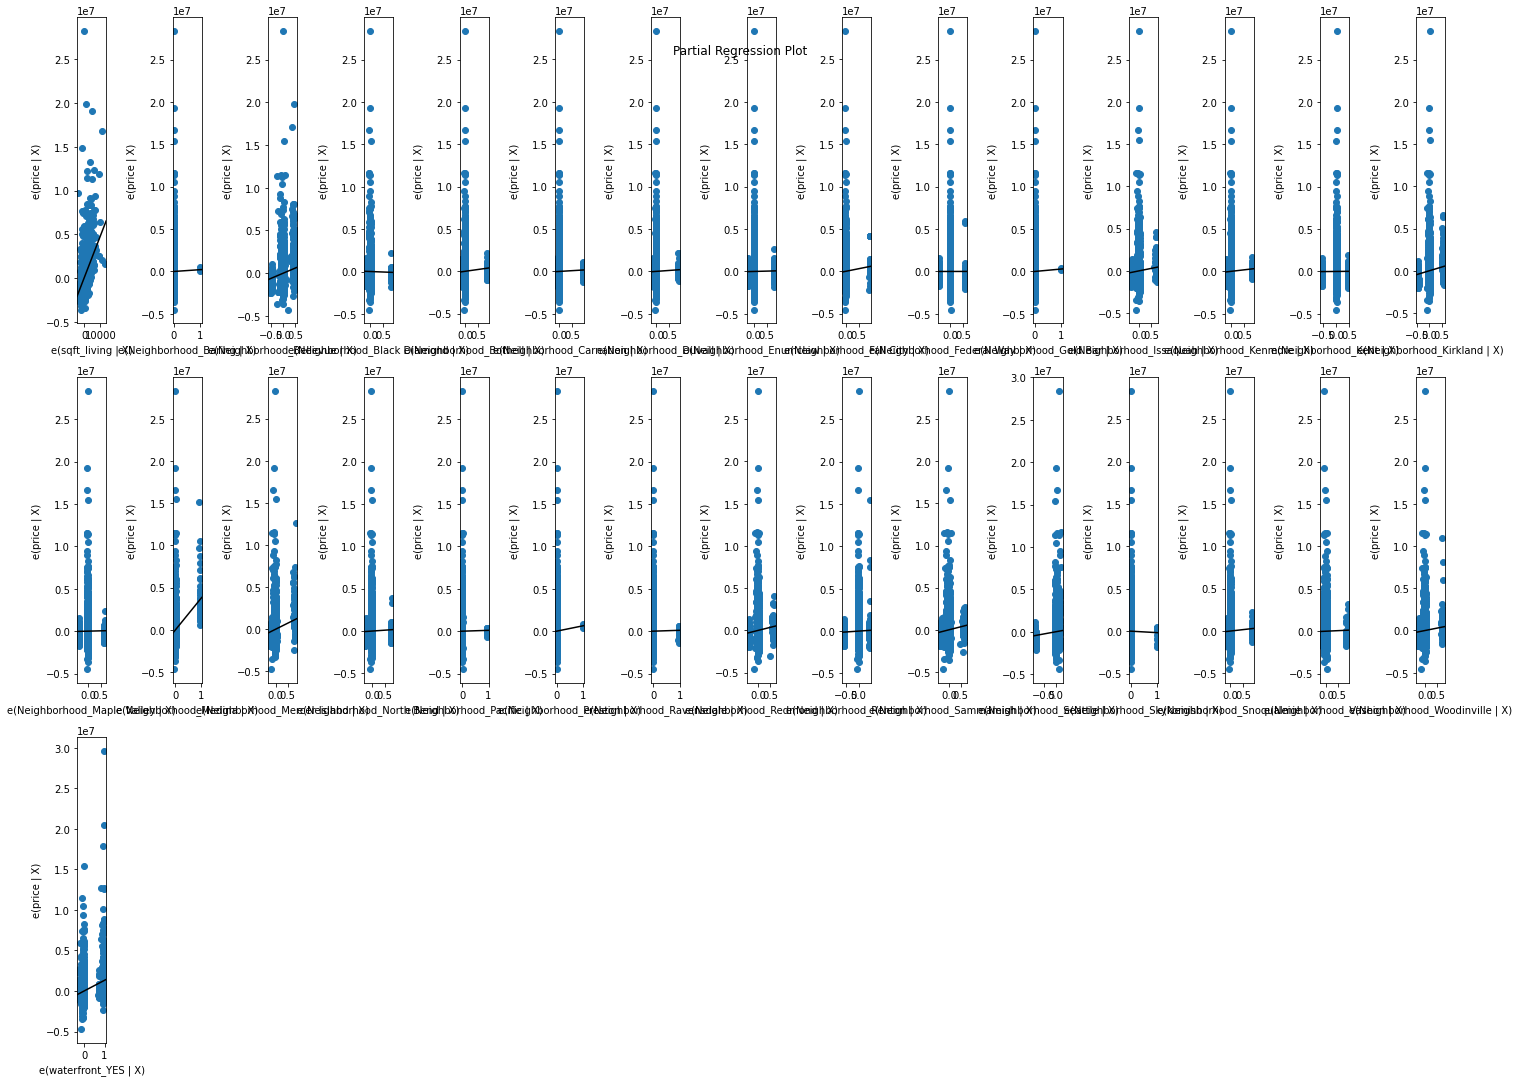

In [87]:
fig = plt.figure(figsize=(20,50))
sm.graphics.plot_partregress_grid(
    results, 
    exog_idx=list(X_iter1.columns),
    grid=(10,15),
    fig=fig)
plt.tight_layout()
plt.show()

In [88]:
# X_iter

In [89]:
# iter_model = sm.OLS(y, sm.add_constant(X_iter))
# iter_results = iter_model.fit()
# print(iter_results.summary())

In [90]:
# iter_mae = mean_absolute_error(y, iter_results.predict(sm.add_constant(X_iter)))
# iter_mae

Our iterated model explains about 53 percent of the variance in `price` using `sqft_living` and `Neighborhood`. There  Overall this model is statistically significant, explaining about 38 percent of the variance in price.

In [92]:
# fig = plt.figure(figsize=(30,220))
# sm.graphics.plot_partregress_grid(
#     iter_results, 
#     exog_idx=list(X_iter.columns),
#     grid=(14,15),
#     fig=fig)
# plt.tight_layout()
# plt.show()

<AxesSubplot:>

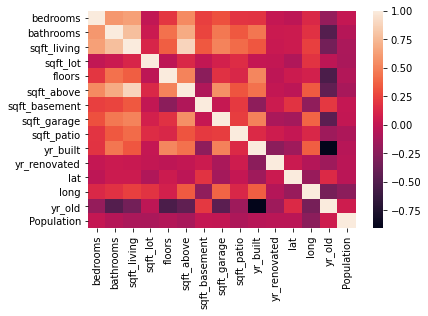

In [93]:
sns.heatmap(X.corr())

ccpr function partial 

In [94]:
# df1['Neighborhood'].value_counts()

In [95]:
# sns.heatmap(X.corr())

In [96]:
# df1.heat_source

### Model Iteration

In [97]:
# running our model with dummified predictors
X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
                      'Neighborhood_Baring', 'grade_2 Substandard' ], axis=1)
y=dum_df1.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     815.4
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:20:10   Log-Likelihood:            -4.2593e+05
No. Observations:               29152   AIC:                         8.520e+05
Df Residuals:                   29087   BIC:                         8.525e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             2.22e+06   1.23e+06      1.801      0.072   -1.97e+05    4.64e+06
bedrooms                        -4.164e+04   4722.854     -8.817      0.000   -5.09e+04   -3.24e+04
bathrooms                        7.042e+04   6445.562     10.926      0.000    5.78e+04    8.31e+04
sqft_living                        56.9762     14.705      3.875      0.000      28.155      85.798
sqft_lot                            0.4536      0.057      7.936      0.000       0.342       0.566
sqft_above                        255.2578     14.605     17.477      0.000     226.631     283.885
sqft_basement                     134.4326     11.245     11.955      0.000     112.392     156.473
sqft_garage                      -131.4608     15.748     -8.348      0.000    -162.328    -100.593
sqft_patio                         63.6995     14.714      4.329      0.000      34.860      92.539
yr_built                         -912.3150    609.903     -1.496      0.135   -2107.752     283.122
yr_renovated                       62.2060     19.324      3.219      0.001      24.330     100.083
yr_old                            664.4318    614.962      1.080      0.280    -540.921    1869.785
Population                          1.1787      0.373      3.158      0.002       0.447       1.910
waterfront_YES                   7.538e+05   2.91e+04     25.913      0.000    6.97e+05    8.11e+05
greenbelt_YES                   -6.456e+04   2.03e+04     -3.179      0.001   -1.04e+05   -2.48e+04
nuisance_YES                    -2.371e+04   8577.367     -2.764      0.006   -4.05e+04   -6898.056
view_EXCELLENT                   6.417e+05   2.94e+04     21.794      0.000    5.84e+05    6.99e+05
view_FAIR                        1.147e+05   3.88e+04      2.957      0.003    3.87e+04    1.91e+05
view_GOOD                        4.735e+04   2.22e+04      2.135      0.033    3884.376    9.08e+04
view_NONE                        -7.72e+04   1.34e+04     -5.760      0.000   -1.03e+05   -5.09e+04
condition_Fair                  -1.184e+05   3.67e+04     -3.223      0.001    -1.9e+05   -4.64e+04
condition_Good                   3.929e+04   8050.077      4.881      0.000    2.35e+04    5.51e+04
condition_Poor                  -9.245e+04   7.11e+04     -1.300      0.193   -2.32e+05    4.69e+04
condition_Very Good              1.004e+05   1.13e+04      8.879      0.000    7.83e+04    1.23e+05
heat_source_Electricity/Solar   -7.649e+04   7.15e+04     -1.071      0.284   -2.17e+05    6.36e+04
heat_source_Gas                  1.127e+04   7659.349      1.472      0.141   -3740.230    2.63e+04
heat_source_Gas/Solar            1.778e+05   5.62e+04      3.165      0.002    6.77e+04    2.88e+05
sewer_system_PRIVATE RESTRICTED -5.758e+05   2.45e+05     -2.347      0.019   -1.06

In [98]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

274566.9981449575

### Utilizing categorical variables

Well, we have a much higher R-squared number after incorporating the dummified categorical predictors, as this model claims to explain 64 percent of the variance in `price`.   The constant is no longer statistically significant, so we need to adjust our figures to more accurately account for why that is happening.  We should next remove columns that are statistically significant.  

MAE dropped significantly.  

## Addressing Multicolinerity

In [99]:
X.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,yr_old,Population
bedrooms,1.000000,0.593408,0.630755,0.000291,0.195625,0.537593,0.234867,0.304974,0.192084,0.182904,0.010753,-0.019399,0.133572,-0.192908,0.013681
bathrooms,0.593408,1.000000,0.779861,0.038917,0.427804,0.680873,0.260681,0.461214,0.333498,0.455823,0.042714,0.046573,0.178023,-0.484471,-0.055996
sqft_living,0.630755,0.779861,1.000000,0.118722,0.355948,0.881704,0.335856,0.503708,0.405895,0.328809,0.035455,0.046253,0.233359,-0.348872,-0.101580
sqft_lot,0.000291,0.038917,0.118722,1.000000,-0.020452,0.128513,0.002418,0.084977,0.157356,0.012632,0.007658,-0.074580,0.183201,-0.013746,-0.106876
floors,0.195625,0.427804,0.355948,-0.020452,1.000000,0.505866,-0.243438,0.179976,0.123638,0.521014,-0.015508,0.047992,0.088202,-0.531770,-0.068456
sqft_above,0.537593,0.680873,0.881704,0.128513,0.505866,1.000000,-0.073831,0.553849,0.320947,0.428496,0.007158,-0.024946,0.337772,-0.437168,-0.114727
sqft_basement,0.234867,0.260681,0.335856,0.002418,-0.243438,-0.073831,1.000000,0.017015,0.214328,-0.227452,0.052547,0.187594,-0.221703,0.207038,0.011529
sqft_garage,0.304974,0.461214,0.503708,0.084977,0.179976,0.553849,0.017015,1.000000,0.228163,0.496895,-0.104440,-0.131875,0.377277,-0.454424,0.002236
sqft_patio,0.192084,0.333498,0.405895,0.157356,0.123638,0.320947,0.214328,0.228163,1.000000,0.136048,0.057764,0.011023,0.122203,-0.155993,-0.095232
yr_built,0.182904,0.455823,0.328809,0.012632,0.521014,0.428496,-0.227452,0.496895,0.136048,1.000000,-0.237206,-0.152983,0.353998,-0.907946,-0.044433


In [100]:
abs(X1.corr()) > .75

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
bedrooms,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
grade_5 Fair,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
grade_6 Low Average,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
grade_7 Average,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
grade_8 Good,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [101]:
X2 = X1.corr().abs().stack().reset_index().sort_values(0, ascending=False)
X2['pairs'] = list(zip(X2.level_0, X2.level_1))
X2.set_index(['pairs'], inplace=True)
X2.drop(columns=['level_1', 'level_0'], inplace = True)
X2.columns = ['cc']
X2.drop_duplicates(inplace=True)
X2[(X2.cc>.75) & (X2.cc<1)]

,cc
pairs,
"(yr_old, yr_built)",0.907946
"(sqft_above, sqft_living)",0.881704
"(bathrooms, sqft_living)",0.779861


In [102]:
X1.drop(columns=['yr_built', 'sqft_above', 'bathrooms'], inplace=True)

There are three sets of variables that are highly correlated: yr_old and yr_built, sqft_above
and sqft_living, and bathrooms with sqft_living

In [103]:
# running our model with dummified predictors
y=dum_df1.price
model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     836.6
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:21:01   Log-Likelihood:            -4.2614e+05
No. Observations:               29152   AIC:                         8.524e+05
Df Residuals:                   29090   BIC:                         8.529e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            5.102e+05   3.51e+04     14.529      0.000    4.41e+05    5.79e+05
bedrooms                        -3.064e+04   4640.681     -6.603      0.000   -3.97e+04   -2.15e+04
sqft_living                       310.6989      6.816     45.585      0.000     297.340     324.058
sqft_lot                            0.4708      0.058      8.182      0.000       0.358       0.584
sqft_basement                     -14.6692      6.756     -2.171      0.030     -27.911      -1.428
sqft_garage                       -68.0990     15.404     -4.421      0.000     -98.292     -37.906
sqft_patio                         65.5330     14.806      4.426      0.000      36.513      94.553
yr_renovated                       90.1147      7.996     11.270      0.000      74.443     105.787
yr_old                           1432.0237    153.716      9.316      0.000    1130.734    1733.313
Population                          1.0943      0.376      2.912      0.004       0.358       1.831
waterfront_YES                   7.614e+05   2.93e+04     26.008      0.000    7.04e+05    8.19e+05
greenbelt_YES                   -6.884e+04   2.05e+04     -3.365      0.001   -1.09e+05   -2.87e+04
nuisance_YES                     -2.09e+04   8635.193     -2.420      0.016   -3.78e+04   -3970.310
view_EXCELLENT                   6.269e+05   2.96e+04     21.148      0.000    5.69e+05    6.85e+05
view_FAIR                        1.165e+05   3.91e+04      2.981      0.003    3.99e+04    1.93e+05
view_GOOD                        3.439e+04   2.23e+04      1.540      0.123   -9369.010    7.82e+04
view_NONE                       -7.626e+04   1.35e+04     -5.650      0.000   -1.03e+05   -4.98e+04
condition_Fair                  -1.006e+05    3.7e+04     -2.721      0.007   -1.73e+05   -2.81e+04
condition_Good                   2.615e+04   8020.814      3.260      0.001    1.04e+04    4.19e+04
condition_Poor                  -7.674e+04   7.16e+04     -1.072      0.284   -2.17e+05    6.36e+04
condition_Very Good              8.362e+04   1.11e+04      7.505      0.000    6.18e+04    1.05e+05
heat_source_Electricity/Solar   -7.309e+04    7.2e+04     -1.016      0.310   -2.14e+05     6.8e+04
heat_source_Gas                   1.52e+04   7696.832      1.975      0.048     111.300    3.03e+04
heat_source_Gas/Solar            1.793e+05   5.66e+04      3.169      0.002    6.84e+04     2.9e+05
sewer_system_PRIVATE RESTRICTED -5.611e+05   2.47e+05     -2.270      0.023   -1.05e+06   -7.67e+04
sewer_system_PUBLIC              1.082e+05   1.11e+04      9.710      0.000    8.63e+04     1.3e+05
Neighborhood_Bellevue            1.009e+06   1.92e+04     52.489      0.000    9.72e+05    1.05e+06
Neighborhood_Bothell              4.56e+05   3.58e+04     12.733      0.000    3.86

In [104]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

276545.223039533

### Final Model

In [105]:
X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
                      'Neighborhood_Baring', 'grade_2 Substandard' ], axis=1)
y=dum_df1.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     815.4
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:21:40   Log-Likelihood:            -4.2593e+05
No. Observations:               29152   AIC:                         8.520e+05
Df Residuals:                   29087   BIC:                         8.525e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             2.22e+06   1.23e+06      1.801      0.072   -1.97e+05    4.64e+06
bedrooms                        -4.164e+04   4722.854     -8.817      0.000   -5.09e+04   -3.24e+04
bathrooms                        7.042e+04   6445.562     10.926      0.000    5.78e+04    8.31e+04
sqft_living                        56.9762     14.705      3.875      0.000      28.155      85.798
sqft_lot                            0.4536      0.057      7.936      0.000       0.342       0.566
sqft_above                        255.2578     14.605     17.477      0.000     226.631     283.885
sqft_basement                     134.4326     11.245     11.955      0.000     112.392     156.473
sqft_garage                      -131.4608     15.748     -8.348      0.000    -162.328    -100.593
sqft_patio                         63.6995     14.714      4.329      0.000      34.860      92.539
yr_built                         -912.3150    609.903     -1.496      0.135   -2107.752     283.122
yr_renovated                       62.2060     19.324      3.219      0.001      24.330     100.083
yr_old                            664.4318    614.962      1.080      0.280    -540.921    1869.785
Population                          1.1787      0.373      3.158      0.002       0.447       1.910
waterfront_YES                   7.538e+05   2.91e+04     25.913      0.000    6.97e+05    8.11e+05
greenbelt_YES                   -6.456e+04   2.03e+04     -3.179      0.001   -1.04e+05   -2.48e+04
nuisance_YES                    -2.371e+04   8577.367     -2.764      0.006   -4.05e+04   -6898.056
view_EXCELLENT                   6.417e+05   2.94e+04     21.794      0.000    5.84e+05    6.99e+05
view_FAIR                        1.147e+05   3.88e+04      2.957      0.003    3.87e+04    1.91e+05
view_GOOD                        4.735e+04   2.22e+04      2.135      0.033    3884.376    9.08e+04
view_NONE                        -7.72e+04   1.34e+04     -5.760      0.000   -1.03e+05   -5.09e+04
condition_Fair                  -1.184e+05   3.67e+04     -3.223      0.001    -1.9e+05   -4.64e+04
condition_Good                   3.929e+04   8050.077      4.881      0.000    2.35e+04    5.51e+04
condition_Poor                  -9.245e+04   7.11e+04     -1.300      0.193   -2.32e+05    4.69e+04
condition_Very Good              1.004e+05   1.13e+04      8.879      0.000    7.83e+04    1.23e+05
heat_source_Electricity/Solar   -7.649e+04   7.15e+04     -1.071      0.284   -2.17e+05    6.36e+04
heat_source_Gas                  1.127e+04   7659.349      1.472      0.141   -3740.230    2.63e+04
heat_source_Gas/Solar            1.778e+05   5.62e+04      3.165      0.002    6.77e+04    2.88e+05
sewer_system_PRIVATE RESTRICTED -5.758e+05   2.45e+05     -2.347      0.019   -1.06

In [106]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

274566.9981449575

## Bathrooms

## Regression Results

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

## Conclusion